In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score,
    plot_confusion_matrix,
    precision_recall_curve,
    plot_precision_recall_curve
)

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import xgboost as xgb

In [5]:
xgb.__version__

'1.0.2'

In [6]:
data = load_wine()

In [7]:
# data

In [8]:
X = pd.DataFrame(data.data, columns=data.feature_names)

In [9]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [10]:
y = data.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# I don't use the native xgb.DMatrix as it would stop me from using the sklearn libraries

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

In [13]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset

In [14]:
clf = xgb.XGBClassifier(param)

In [15]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [16]:
preds = clf.predict(X_test)

In [17]:
preds

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [18]:
# would be used only with xgb.DMatrix
#
# best_preds = np.asarray([np.argmax(line) for line in preds])

In [19]:
# best_preds

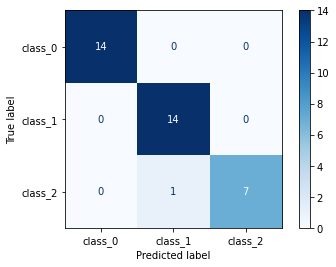

In [20]:
plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=data.target_names,
                                 cmap=plt.cm.Blues)

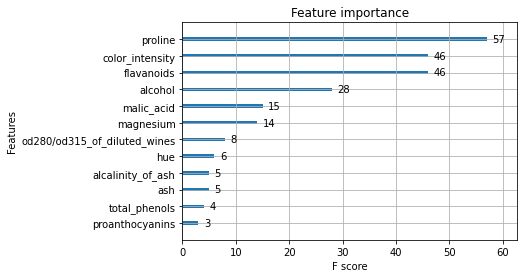

In [21]:
xgb.plot_importance(clf)

# Shap

In [23]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [75]:
# If this cell fails, have a look at https://github.com/slundberg/shap/issues/1215
# very likely your version of xgboost is not compatible with shap 

explainer = shap.TreeExplainer(clf) # , data=X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [76]:
shap_values = explainer.shap_values(X)

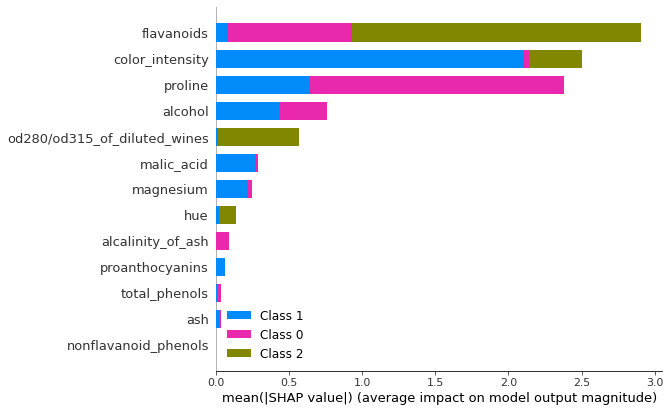

In [77]:
shap.summary_plot(shap_values, X)

In [78]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X)

In [79]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X)

In [80]:
shap.force_plot(explainer.expected_value[2], shap_values[2], X)

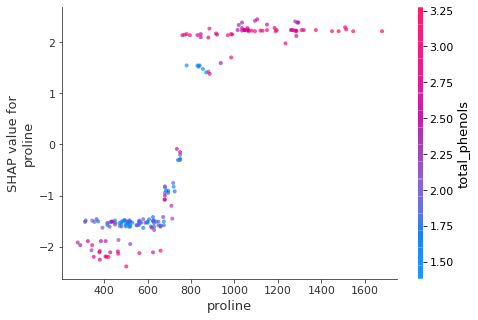

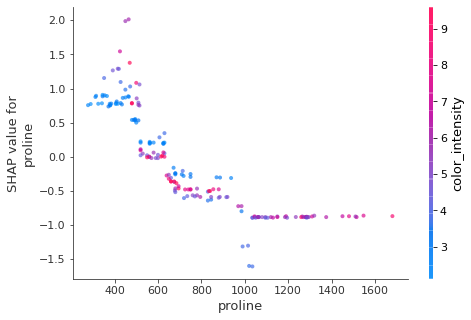

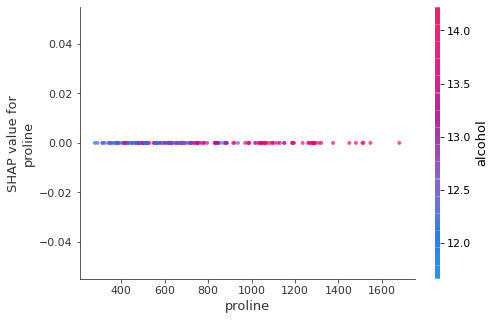

In [82]:
# How annoying is that I cannot make this work?
#
# fig, _ax = plt.subplots(1, 3, figsize=(20, 7))

for i in range(3):
    shap.dependence_plot("proline", shap_values[i], X, alpha=0.66)

# fig.tight_layout()